In [1]:
import numpy as np
import pylab as plt

#Reaction rates and stochioometrix matrix are hard coded
ktx = 1.0
kdeg = .1
stochiometrix_matrix = np.array([[0, 1], [0, -1]])

def Gillespie(X, dT, t0):
    print("simulating from ", t0, "to", t0+dT)
    #X: initial condition
    #dT: how long to simulate
    #t0: simulation start time
    
    states = [np.array(X)] #List of states for plotting
    times = [t0] #list of times for plotting
    
    t = t0 #Current time
    while t < t0 + dT:
        #Calculate propensities
        propensities = [ktx*X[0], kdeg*X[1]]
        prop_sum = sum(propensities)

        #Wait time is distributed exponentially
        wait_time = np.random.exponential(scale = prop_sum) #Random wait time

        #We haven't hit the end of the simulation
        if wait_time + t < t0 + dT:
            t += wait_time

            #Change state
            r_rxn = np.random.random() #choose next reaction using this random number
            for i in range(len(propensities)):
                if r_rxn < propensities[i]/prop_sum:
                    #This means propensity i fires
                    break
            X += stochiometrix_matrix[i]

            #For plotting - not needed in Vivarium
            times.append(t)
            states.append(np.array(X))

        else: #We have hit the end of the simulation
            #Don't update states
            return times, states

Simulating from  0.0 to 10.0
simulating from  0.0 to 10.0
Simulating from  10.0 to 20.0
simulating from  10.0 to 20.0
Simulating from  20.0 to 30.0
simulating from  20.0 to 30.0
Simulating from  30.0 to 40.0
simulating from  30.0 to 40.0
Simulating from  40.0 to 50.0
simulating from  40.0 to 50.0
Simulating from  50.0 to 60.0
simulating from  50.0 to 60.0
Simulating from  60.0 to 70.0
simulating from  60.0 to 70.0
Simulating from  70.0 to 80.0
simulating from  70.0 to 80.0
Simulating from  80.0 to 90.0
simulating from  80.0 to 90.0
Simulating from  90.0 to 100.0
simulating from  90.0 to 100.0


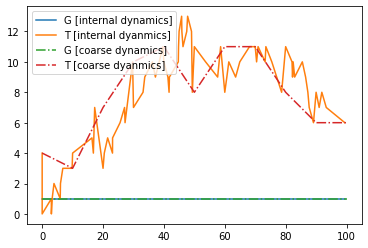

In [3]:
#Run gillespie iteratively

N_steps = 10
dT = 10.0 #Timestep

#these keep track of the dynamics every dT
coarse_states = [np.array([1, 0])]
coarse_times = [0]

#These keep track of the internal gillespie dynamics
true_states = [coarse_states[0]]
true_times = [coarse_times[0]]
for i in range(N_steps):
    t0 = i*dT
    print("Simulating from ", t0, "to", t0 + dT)
    new_times, new_states = Gillespie(coarse_states[-1], dT, t0)
    
    #coarse dynamics
    coarse_states.append(new_states[-1])
    coarse_times.append(t0+dT)
    
    #full internal dynamics
    true_states += new_states
    true_times += new_times

plt.plot(true_times, [s[0] for s in true_states], label = "G [internal dynamics]")
plt.plot(true_times, [s[1] for s in true_states], label = "T [internal dyanmics]")

plt.plot(coarse_times, [s[0] for s in coarse_states], "-.", label = "G [coarse dynamics]")
plt.plot(coarse_times, [s[1] for s in coarse_states], "-.", label = "T [coarse dyanmics]")

plt.legend()

    